In [5]:
import pandas as pd

In [6]:
pd.options.display.max_rows = 500

In [7]:
epidemics = pd.read_csv('/Users/mathildecontreras/Documents/CD_Dataset/archive/Chronological Table of Epidemic and Pandemic Events in human History.csv', delimiter=",", encoding='utf-8')

In [8]:
epidemics.head(258)

,Unnamed: 0,Event,Date,Location,Disease,Death toll (estimate),Ref.
0,0,1350 BC plague of Megiddo,1350 BC,"Megiddo, land of Canaan","Amarna letters EA 244, Biridiya, mayor of Megi...",Unknown,[26]
1,1,Plague of Athens,430–426 BC,"Greece, Libya, Egypt, Ethiopia","Unknown, possibly typhus, typhoid fever or vir...","75,000–100,000",[27][28][29][30]
2,2,412 BC epidemic,412 BC,"Greece (Northern Greece, Roman Republic)","Unknown, possibly influenza",Unknown,[31]
3,3,Antonine Plague,165–180 (possibly up to 190),Roman Empire,"Unknown, possibly smallpox",5–10 million,[32][33]
4,4,Jian'an Plague,217,Han Dynasty,"Unknown, possibly typhoid fever or viral hemor...",Unknown,[34][35]
5,5,Plague of Cyprian,249–262,Europe,"Unknown, possibly smallpox",310000,[36][37]
6,6,Plague of Justinian (beginning of first plague...,541–549,Europe and West Asia,Bubonic plague,15–100 million,[8][38][39]
7,7,Roman Plague of 590 (part of first plague pand...,590,"Rome, Byzantine Empire",Bubonic plague,Unknown,[40]
8,8,Plague of Sheroe (part of First plague pandemic),627–628,Bilad al-Sham,Bubonic plague,"25,000+",NaN
9,9,Plague of Amwas (part of first plague pandemic),638–639,"Byzantine Empire, West Asia, Africa",Bubonic plague,"25,000+",[41]


**What locations and years are associated with recorded instances of the Bubonic Plague in the dataset?**

In [9]:
bubonic_plague_instances = epidemics[epidemics['Disease'] == 'Bubonic plague'] #select all instances of Bubonic plague

In [10]:
#show only location and year who contain an instance of bubonic plague.
if not bubonic_plague_instances.empty:
    locations_years_bubonic_plague = bubonic_plague_instances[['Location', 'Date']]
    print("Locations and Years associated with Bubonic Plague:")
    print(locations_years_bubonic_plague) 
else:
    print("No recorded instances of Bubonic Plague in the dataset.")

Locations and Years associated with Bubonic Plague:
                                             Location       Date
6                                Europe and West Asia    541–549
7                              Rome, Byzantine Empire        590
8                                       Bilad al-Sham    627–628
9                 Byzantine Empire, West Asia, Africa    638–639
10                                      British Isles    664–689
11    Byzantine Empire, West Asia, Syria, Mesopotamia    698–701
13                Byzantine Empire, West Asia, Africa    746–747
22                                    London, England  1563–1564
24                                    Tenerife, Spain  1582–1583
26                                              Malta  1592–1593
27                                    London, England  1592–1593
28                                              Spain  1596–1602
30                                    London, England       1603
32                                    

**What is the most common location recorded in the dataset for epidemics, and how many instances have been reported in that location?**

In [11]:
most_common_location = epidemics['Location'].mode().values[0]
location_count = epidemics['Location'].value_counts().max()

print(f"The most common location for epidemics is '{most_common_location}' with {location_count} instances reported.")

The most common location for epidemics is 'Worldwide' with 20 instances reported.


**What is the location with the least number of recorded instances of epidemics, and how many instances have been reported in that location?**

In [12]:
least_common_location = epidemics['Location'].value_counts().idxmin()
least_location_count = epidemics['Location'].value_counts().min()

print(f"The location with the least instances of epidemics is '{least_common_location}' with {least_location_count} instances reported.")

The location with the least instances of epidemics is 'Croydon, United Kingdom' with 1 instances reported.


**Which locations have had more than 2 instances of Smallpox, and how many instances were recorded in each of those locations?**

In [13]:
bubonic_instances = epidemics[epidemics['Disease'] == 'Bubonic plague']

In [14]:
location_instance_counts = bubonic_instances['Location'].value_counts()

In [15]:
locations_more_than_2_instances = location_instance_counts[location_instance_counts > 2]

In [16]:
if not locations_more_than_2_instances.empty:
    print("Locations with more than 2 instances of Bubonic plague:")
    print(locations_more_than_2_instances)
else:
    print("No locations with more than 2 instances of Bubonic plague.")

Locations with more than 2 instances of Bubonic plague:
Ottoman Empire     3
London, England    3
Malta              3
Spain              3
Name: Location, dtype: int64


**Vizualisation of the number of instances for the selected countries: China, Spain, Italy, England, France and Russia.** 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
selected_countries = ['China', 'Spain', 'Italy', 'England', 'France', 'Russia']
selected_instances = epidemics[epidemics['Location'].isin(selected_countries)]

In [29]:
country_counts = selected_instances['Location'].value_counts()

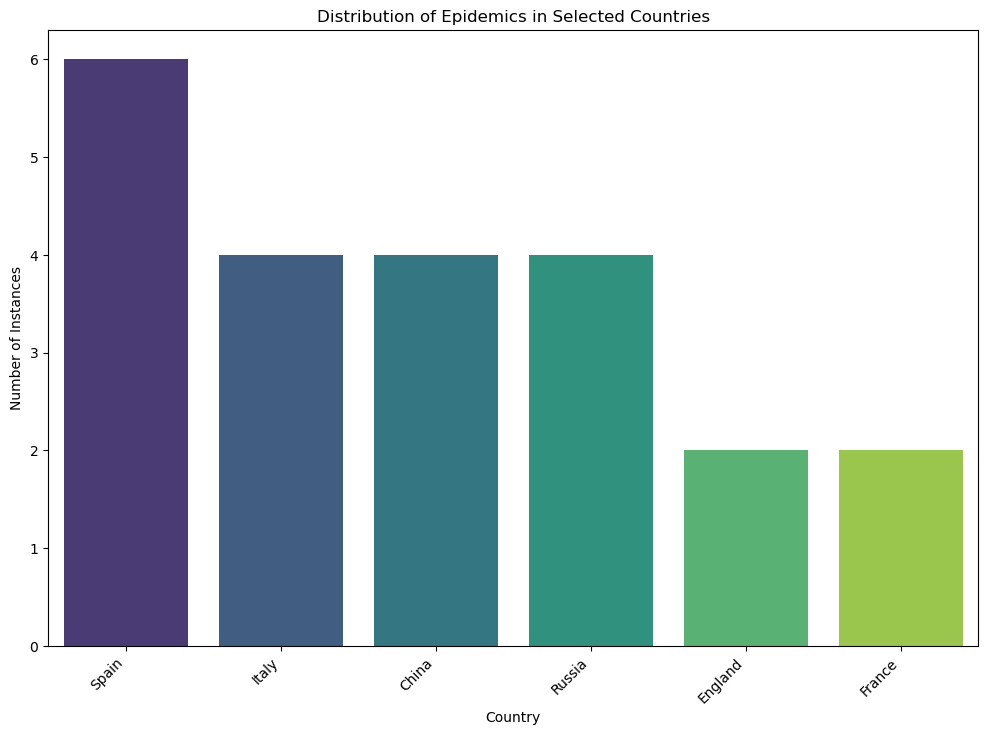

In [30]:
plt.figure(figsize=(12, 8))
bar_chart = sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution of Epidemics in Selected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Instances')
plt.show()